In [2]:
import pandas as pd
df = pd.read_csv("/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


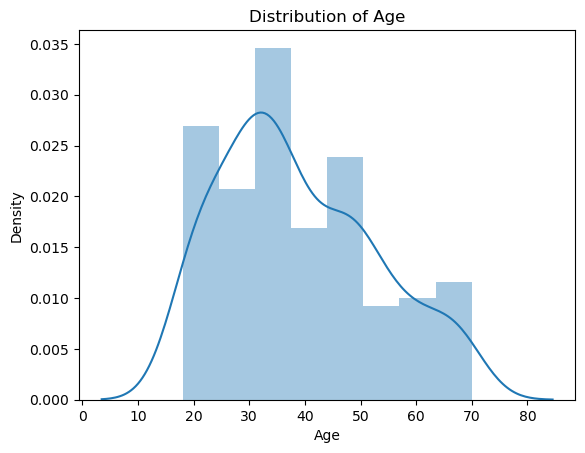

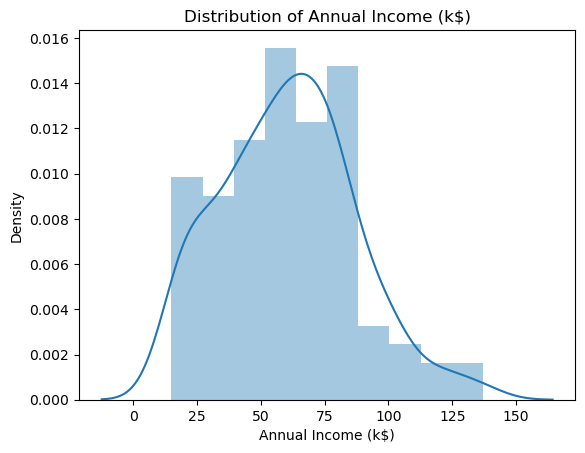

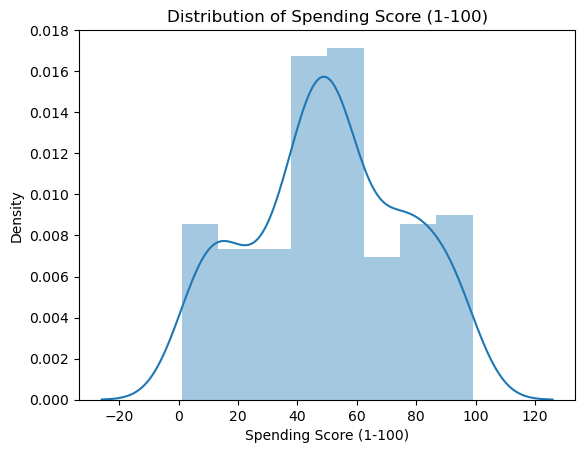

In [5]:
numerical_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i, col in enumerate(numerical_cols):
    plt.figure()
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [6]:
data_x = df.iloc[:, [3,4]].values

for k cluster: 2, silhoutte score is: 0.2968969162503008
for k cluster: 3, silhoutte score is: 0.46761358158775435
for k cluster: 4, silhoutte score is: 0.4931963109249047
for k cluster: 5, silhoutte score is: 0.553931997444648
for k cluster: 6, silhoutte score is: 0.53976103063432
for k cluster: 7, silhoutte score is: 0.5264283703685728
for k cluster: 8, silhoutte score is: 0.45827056882053113
for k cluster: 9, silhoutte score is: 0.4553729779390266
for k cluster: 10, silhoutte score is: 0.45925273534781125


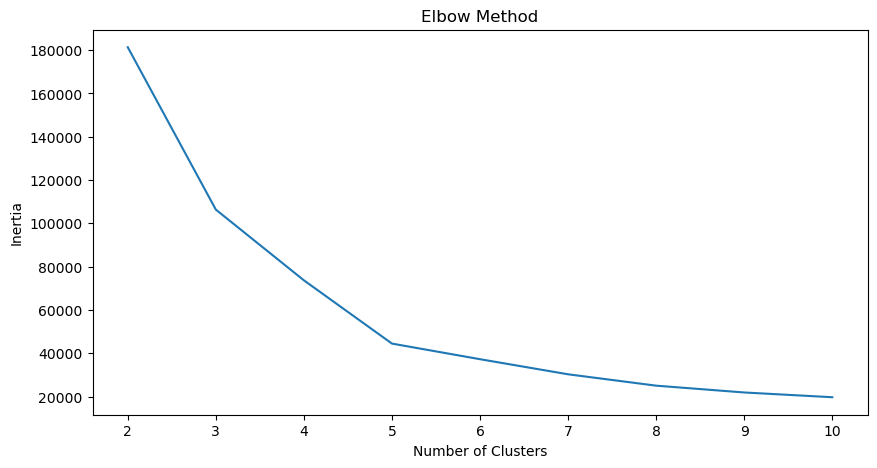

In [7]:
wcss = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(data_x)
    wcss.append(km.inertia_)
    cluster_labels = km.fit_predict(data_x)
    silhoutte_avg = silhouette_score(data_x, cluster_labels)
    print(f"for k cluster: {i}, silhoutte score is: {silhoutte_avg}")

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=list(range(2,11)), y=wcss, ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")
plt.show()

In [29]:
cluster_5 = KMeans(n_clusters=5, random_state=42)
df["cluster_label"] = cluster_5.fit_predict(data_x)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

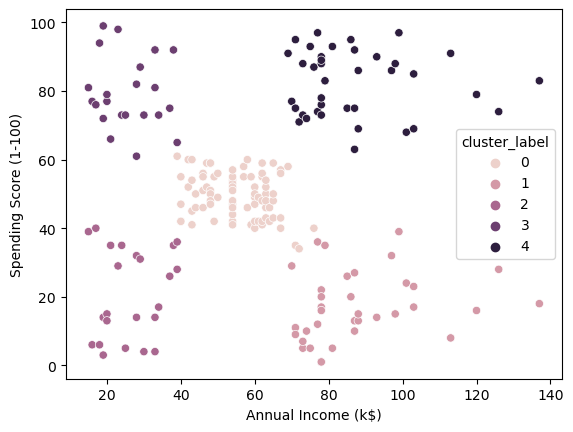

In [31]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster_label")

In [35]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [42]:
cols = ['Annual Income (k$)', 'Spending Score (1-100)', "cluster_label"]
agg_df = df[cols]

In [48]:
table_agg = agg_df.groupby("cluster_label")["Spending Score (1-100)","Annual Income (k$)"].mean().reset_index()

In [51]:
agg_melt = table_agg.melt(id_vars="cluster_label")
agg_melt

,cluster_label,variable,value
0,0,Spending Score (1-100),49.518519
1,1,Spending Score (1-100),17.114286
2,2,Spending Score (1-100),20.913043
3,3,Spending Score (1-100),79.363636
4,4,Spending Score (1-100),82.128205
5,0,Annual Income (k$),55.296296
6,1,Annual Income (k$),88.200000
7,2,Annual Income (k$),26.304348
8,3,Annual Income (k$),25.727273
9,4,Annual Income (k$),86.538462


<Axes: xlabel='cluster_label', ylabel='value'>

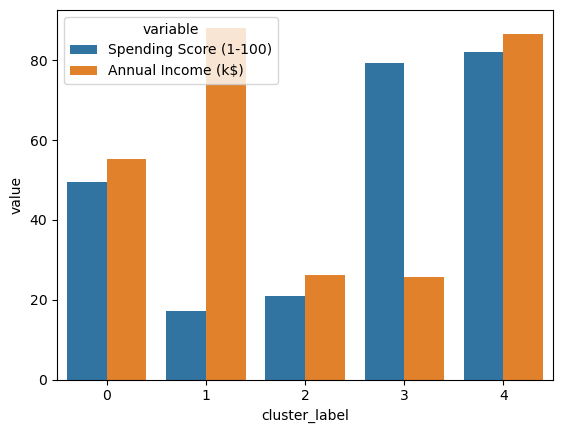

In [53]:
sns.barplot(data=agg_melt, x="cluster_label", y="value", hue="variable" )

### Conclusion
The data shows that customers in Cluster 0 have a moderate spending score and an average annual income. Cluster 1 consists of customers with a low spending score but a relatively high annual income. In Cluster 2, customers have a low spending score and a low annual income. Cluster 3 contains customers with a high spending score and a relatively low annual income. Finally, Cluster 4 comprises customers with both high spending scores and high annual incomes.